In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import OneHotEncoder

from joblib import dump,load
#%matplotlib notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import random
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
train_data = load('train_data')
test_data = load('test_data')
y_train = load('y_train')
y_test = load('y_test')

In [3]:
train_data.shape, y_train.shape

((16132, 15), (16132,))

In [4]:
test_data.shape,y_test.shape

((6914, 15), (6914,))

In [5]:
train_data.head(2)

,url,address,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_in(type),listed_in(city)
28653,https://www.zomato.com/bangalore/kaaram-korama...,"11, Eat Street, 80 Feet Road, Opposite Indian ...",Yes,No,326,080 49653061\r\r\r\n+91 9742457293,Koramangala 6th Block,Casual Dining,Biryani Biryani Biryani Biryani Biryani Dum Gu...,Andhra Biryani,500,"[('Rated 3.0', 'RATED\n Tried home delivery. ...","['Chicken Chilli Kabab', 'Chicken Garlic Kabab...",Dine-out,Koramangala 4th Block
5935,https://www.zomato.com/bangalore/brownie-heave...,"110-A, Westminister Building, Cunningham Road,...",Yes,No,33,080 43747949\r\n+91 9742023272,Cunningham Road,Dessert Parlor,Brownie Brownie Chocolate Chocolate Chocolate ...,Desserts Fast Food,300,"[('Rated 4.0', ""RATED\n So we wanted to have ...","['Eggless Classic Brownie', 'Classic Brownie',...",Desserts,Brigade Road


In [6]:
# re-insert rate column in train data
train_data.insert(2, 'Rate', y_train, allow_duplicates = False)

In [7]:
# check shape
train_data.shape

(16132, 16)

In [8]:
train_data.head(2)

,url,address,Rate,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_in(type),listed_in(city)
28653,https://www.zomato.com/bangalore/kaaram-korama...,"11, Eat Street, 80 Feet Road, Opposite Indian ...",3.9,Yes,No,326,080 49653061\r\r\r\n+91 9742457293,Koramangala 6th Block,Casual Dining,Biryani Biryani Biryani Biryani Biryani Dum Gu...,Andhra Biryani,500,"[('Rated 3.0', 'RATED\n Tried home delivery. ...","['Chicken Chilli Kabab', 'Chicken Garlic Kabab...",Dine-out,Koramangala 4th Block
5935,https://www.zomato.com/bangalore/brownie-heave...,"110-A, Westminister Building, Cunningham Road,...",4.2,Yes,No,33,080 43747949\r\n+91 9742023272,Cunningham Road,Dessert Parlor,Brownie Brownie Chocolate Chocolate Chocolate ...,Desserts Fast Food,300,"[('Rated 4.0', ""RATED\n So we wanted to have ...","['Eggless Classic Brownie', 'Classic Brownie',...",Desserts,Brigade Road


In [9]:
# Re-Insert 'rate' column in test dataframe.
test_data.insert(2, 'Rate', y_test, allow_duplicates = False)
test_data.shape

(6914, 16)

In [10]:
test_data.head(2)

,url,address,Rate,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_in(type),listed_in(city)
35957,https://www.zomato.com/bangalore/154-breakfast...,"154, 8th Main Road, 3rd Block, Koramangala 3rd...",4.0,Yes,Yes,1519,080 25533133,Koramangala 3rd Block,Cafe,Bbq Big Breakfast Mushroom Nutella Omelette Pa...,Cafe Continental,900,"[('Rated 4.0', ''), ('Rated 4.0', ''), ('Rated...",[],Delivery,Koramangala 7th Block
4975,https://www.zomato.com/bangalore/kitchen-on-ta...,"Shantala nagar, Ashok Nagar, Brigade Road, Ban...",4.0,Yes,No,48,+91 9343044750,Brigade Road,Casual Dining,Food Sea Sushi,Asian Japanese Sushi,1500,"[('Rated 4.0', 'RATED\n This restaurant was r...",[],Buffet,Brigade Road


In [11]:
# # https://www.geeksforgeeks.org/python-creating-a-pandas-dataframe-column-based-on-a-given-condition/

key_dict = dict()
def provide_response_coded_features(groupByVal,columnName, df):
    
    '''
    This function is used to convert categorical features into response coded features.
    It simply perform MEAN VALUE REPLACEMENT.
    '''
    
    ## distribute values group by n take mean of rate column
    mean_df = df.groupby([groupByVal]).mean()
    ## stored in dict data type.. key is column name and values in mean value of rate column.
    mean_dict =mean_df['Rate'].to_dict()
    key_dict.update([ (groupByVal, mean_dict) ] )
    for k, v in mean_dict.items():
            mean_dict[k] = round(v,2)
    df[columnName] = df[groupByVal].map(mean_dict) 
    return df

In [12]:
# create response coded feature for online_order feature.
mean_online_order =provide_response_coded_features('online_order','mean_online_order',train_data)
mean_online_order[['Rate','online_order','mean_online_order']][:10]

,Rate,online_order,mean_online_order
28653,3.9,Yes,3.89
5935,4.2,Yes,3.89
11546,4.4,No,3.93
17899,3.9,Yes,3.89
50256,3.9,Yes,3.89
8289,4.3,No,3.93
43207,4.1,No,3.93
34447,4.2,Yes,3.89
50330,4.1,Yes,3.89
32243,3.9,Yes,3.89


In [13]:
mean_book_table =provide_response_coded_features('book_table','mean_book_table',train_data)
mean_book_table[['Rate','book_table','mean_book_table']][:10]

,Rate,book_table,mean_book_table
28653,3.9,No,3.81
5935,4.2,No,3.81
11546,4.4,Yes,4.16
17899,3.9,No,3.81
50256,3.9,No,3.81
8289,4.3,Yes,4.16
43207,4.1,No,3.81
34447,4.2,No,3.81
50330,4.1,No,3.81
32243,3.9,No,3.81


In [14]:
# create response coded feature for rest_type feature.

mean_rest_type =provide_response_coded_features('rest_type','mean_rest_type',train_data)
mean_rest_type[['Rate','rest_type','mean_rest_type']][:20]

,Rate,rest_type,mean_rest_type
28653,3.9,Casual Dining,3.84
5935,4.2,Dessert Parlor,4.09
11546,4.4,Dining Fine,4.20
17899,3.9,Casual Dining,3.84
50256,3.9,Beverage Bites Quick Shop,3.94
8289,4.3,Casual Dining,3.84
43207,4.1,Dining Fine,4.20
34447,4.2,Bites Quick,3.74
50330,4.1,Bakery Dessert Parlor,4.01
32243,3.9,Delivery,3.76


In [15]:
# create response coded feature for location feature.

mean_location =provide_response_coded_features('location','mean_location',train_data)
mean_location[['Rate','location','mean_location']][:10]

,Rate,location,mean_location
28653,3.9,Koramangala 6th Block,3.94
5935,4.2,Cunningham Road,4.08
11546,4.4,Lavelle Road,4.22
17899,3.9,Brigade Road,3.95
50256,3.9,Brookefield,3.70
8289,4.3,Koramangala 7th Block,3.99
43207,4.1,MG Road,3.95
34447,4.2,BTM,3.74
50330,4.1,"ITPL Main Road, Whitefield",3.62
32243,3.9,Koramangala,4.00


In [16]:
# create response coded feature for cuisines feature.

mean_cuisines =provide_response_coded_features('cuisines','mean_cuisines',train_data)
mean_cuisines[['Rate','cuisines','mean_cuisines']][:10]

,Rate,cuisines,mean_cuisines
28653,3.9,Andhra Biryani,3.88
5935,4.2,Desserts Fast Food,4.11
11546,4.4,Continental Indian Italian North,4.02
17899,3.9,Continental Desserts Italian Pizza,4.00
50256,3.9,Beverages Fast Food,3.99
8289,4.3,Arabian Beverages Indian North,4.28
43207,4.1,Chinese,3.84
34447,4.2,Chinese Indian Kerala South,4.16
50330,4.1,Bakery Desserts,3.94
32243,3.9,American Biryani Burger Chinese Continental Fo...,3.63


In [17]:
# create response coded feature for dish_liked feature.

mean_dish_liked =provide_response_coded_features('dish_liked','mean_dish_liked',train_data)
mean_dish_liked[['Rate','dish_liked','mean_dish_liked']][:10]

,Rate,dish_liked,mean_dish_liked
28653,3.9,Biryani Biryani Biryani Biryani Biryani Dum Gu...,3.90
5935,4.2,Brownie Brownie Chocolate Chocolate Chocolate ...,4.19
11546,4.4,Breakfast Buffet Cake Chicken Chocolate Lasagn...,4.40
17899,3.9,Fries Mocktails Mozzarella Pasta Pizza Salad S...,3.90
50256,3.9,Banana Cake Cake Chai Coffee Ginger Ginger Poh...,3.90
8289,4.3,Arabic Baklava Biryani Biryani Chicken Cuisine...,4.30
43207,4.1,Chicken Clear Crabmeat Crispy Duck Food Jasmin...,4.10
34447,4.2,Appam Beef Chicken Curry Curry Egg Fish Fry Gh...,4.20
50330,4.1,Blueberry Blueberry Brownie Cheesecake Chocola...,4.10
32243,3.9,Bowl Burgers Burrito Fish Pasta Pizza Salads S...,3.90


In [18]:
for feature,values in key_dict.items():
    print(feature)

online_order
book_table
rest_type
location
cuisines
dish_liked


In [19]:
def return_dict_mean_value(query_feature):
    
    '''
    'key_dict' is dictionary object which has all the Categorical variable names store as KEY and its mean as VALUE.
    This is function is used to return mean value for query_feature.
    
    KEY ==> 
    Value ==> Mean value response to that key
    
    query_feature ==>  Desired key
    Return ==> Categorical feature and their corresponding mean values. 
    '''
    
    result_dict=dict()

    for feature_name, values in key_dict.items():    
        if feature_name == query_feature:
            for key in values:
                result_dict.update([ (key, values[key]) ] )

                print(key + ':', values[key])
    return result_dict
return_dict_mean_value('online_order')

No: 3.93
Yes: 3.89


{'No': 3.93, 'Yes': 3.89}

In [20]:
## similarly we will create same response coded features for test dataset
## Test data

dict_online = return_dict_mean_value('online_order')
dict_book_table = return_dict_mean_value('book_table')
dict_rest_type = return_dict_mean_value('rest_type')
dict_location = return_dict_mean_value('location')
dict_cuisines = return_dict_mean_value('cuisines')
dict_dish_liked = return_dict_mean_value('dish_liked')

No: 3.93
Yes: 3.89
No: 3.81
Yes: 4.16
Bakery: 3.93
Bakery Bites Quick: 3.49
Bakery Cafe: 3.99
Bakery Dessert Parlor: 4.01
Bar: 3.98
Bar Bites Quick: 4.0
Bar Cafe: 4.1
Bar Casual Dining: 4.18
Bar Dining Fine: 4.22
Bar Lounge: 3.94
Bar Microbrewery: 4.45
Bar Pub: 4.03
Beverage Bites Quick Shop: 3.94
Beverage Cafe Shop: 3.8
Beverage Dessert Parlor Shop: 4.0
Beverage Shop: 4.01
Bites Cafe Quick: 3.75
Bites Court Food Quick: 3.6
Bites Dessert Parlor Quick: 3.8
Bites Quick: 3.74
Bites Quick Shop Sweet: 3.8
Cafe: 3.99
Cafe Casual Dining: 4.19
Cafe Dessert Parlor: 4.19
Cafe Lounge: 4.21
Cafe Pub: 4.65
Cafee Casual Dining Irani: 4.4
Casual Club Dining: 3.95
Casual Court Dining Food: 2.6
Casual Dining: 3.84
Casual Dining Lounge: 4.09
Casual Dining Microbrewery: 4.36
Casual Dining Pub: 4.14
Club: 4.07
Court Food: 3.66
Delivery: 3.76
Delivery Takeaway: 3.78
Dessert Parlor: 4.09
Dhaba: 3.6
Dining Fine: 4.2
Dining Fine Lounge: 4.4
Dining Fine Microbrewery: 4.3
Food Truck: 3.6
Kiosk: 3.94
Lounge: 3.9

In [21]:
test_data['mean_online_order'] = test_data['online_order'].map(dict_online)

In [22]:
test_data['mean_book_table'] = test_data['book_table'].map(dict_book_table)

In [23]:
test_data['mean_rest_type'] = test_data['rest_type'].map(dict_rest_type)

In [24]:
test_data['mean_location'] = test_data['location'].map(dict_location)

In [25]:
test_data['mean_cuisines'] = test_data['cuisines'].map(dict_cuisines)

In [26]:
test_data['mean_dish_liked'] = test_data['dish_liked'].map(dict_dish_liked)

In [27]:
##check NaN values. NaN value arise because there are some categories those are not present in test set.
test_data.isna().sum()

url                    0
address                0
Rate                   0
online_order           0
book_table             0
votes                  0
phone                  0
location               0
rest_type              0
dish_liked             0
cuisines               0
average_cost           0
reviews_list           0
menu_item              0
listed_in(type)        0
listed_in(city)        0
mean_online_order      0
mean_book_table        0
mean_rest_type         2
mean_location          0
mean_cuisines         64
mean_dish_liked      489
dtype: int64

In [28]:
print("There are some category which is not present in train set which is % ",((2+64+489)/test_data.shape[0])*100)

There are some category which is not present in train set which is %  8.027191206248192


In [29]:
# drop null values
test_data.dropna(subset=['mean_dish_liked','mean_rest_type','mean_cuisines'],inplace=True)

In [30]:
test_data.isna().sum()

url                  0
address              0
Rate                 0
online_order         0
book_table           0
votes                0
phone                0
location             0
rest_type            0
dish_liked           0
cuisines             0
average_cost         0
reviews_list         0
menu_item            0
listed_in(type)      0
listed_in(city)      0
mean_online_order    0
mean_book_table      0
mean_rest_type       0
mean_location        0
mean_cuisines        0
mean_dish_liked      0
dtype: int64

In [31]:
y_test= test_data['Rate']

In [32]:
train_data.columns

Index(['url', 'address', 'Rate', 'online_order', 'book_table', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'average_cost', 'reviews_list', 'menu_item', 'listed_in(type)',
       'listed_in(city)', 'mean_online_order', 'mean_book_table',
       'mean_rest_type', 'mean_location', 'mean_cuisines', 'mean_dish_liked'],
      dtype='object')

In [33]:
train_data.drop(columns=['rest_type','location','cuisines','dish_liked','menu_item','url','phone','reviews_list','listed_in(type)','listed_in(city)','address','online_order','book_table','Rate'], inplace=True)

In [34]:
train_data.columns

Index(['votes', 'average_cost', 'mean_online_order', 'mean_book_table',
       'mean_rest_type', 'mean_location', 'mean_cuisines', 'mean_dish_liked'],
      dtype='object')

In [35]:
test_data.columns

Index(['url', 'address', 'Rate', 'online_order', 'book_table', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'average_cost', 'reviews_list', 'menu_item', 'listed_in(type)',
       'listed_in(city)', 'mean_online_order', 'mean_book_table',
       'mean_rest_type', 'mean_location', 'mean_cuisines', 'mean_dish_liked'],
      dtype='object')

In [36]:
test_data.drop(columns=['rest_type','location','cuisines','dish_liked','menu_item','url','phone','reviews_list','listed_in(type)','listed_in(city)','address','online_order','book_table','Rate'], inplace=True)

In [37]:
test_data.columns

Index(['votes', 'average_cost', 'mean_online_order', 'mean_book_table',
       'mean_rest_type', 'mean_location', 'mean_cuisines', 'mean_dish_liked'],
      dtype='object')

In [38]:
# always verify shapes
train_data.shape, y_train.shape

((16132, 8), (16132,))

In [41]:
# always verify shapes
test_data.shape, y_test.shape

((6405, 8), (6405,))

In [42]:
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [43]:
def mse(y, y_pred):
    return np.mean((y_pred - y)**2) 

mse_scorer = make_scorer(mse, greater_is_better=False)

In [44]:
import random

rand_pred= np.zeros(y_test.shape[0])
for i in range(y_test.shape[0]):
    rand_probs = round(random.uniform(1.0, 5.0),2)
    rand_pred[i] = rand_probs

mse(y_test, rand_pred)

2.331061951600315

## Model - 1 Linear Regression Model

In [45]:
lr = LinearRegression()
lr.fit(train_data,y_train)
y_pred_lr = lr.predict(test_data)

mse(y_test, y_pred_lr)

0.009480108537376688

In [49]:
base_imp = pd.DataFrame({"features":train_data.columns, "feature_importance":lr.coef_})
base_imp

,features,feature_importance
0,votes,-9.667180e-07
1,average_cost,-1.964055e-07
2,mean_online_order,-1.484983e-01
3,mean_book_table,1.934189e-04
4,mean_rest_type,-1.007759e-02
5,mean_location,2.377197e-02
6,mean_cuisines,3.537434e-02
7,mean_dish_liked,9.827036e-01


In [52]:
Randpred = pd.DataFrame({ "actual": y_test, "pred": y_pred_lr })
Randpred

,actual,pred
35957,4.0,4.004962
4975,4.0,4.007328
21830,3.9,3.888549
11982,3.7,3.700317
2597,3.8,3.789058
...,...,...
6961,3.9,4.003845
19450,4.1,4.100658
32469,3.5,3.419166
3029,4.1,4.079376


## Model - 2 SGD Regression Model

In [53]:
sgdReg = linear_model.SGDRegressor()
sgdReg.fit(train_data,y_train)
y_pred_sgdr = sgdReg.predict(test_data)

mse(y_test, y_pred_sgdr)

1.0239604907434835e+29

## Model - 3 Random Forest Regressor Model

In [54]:
rfr = RandomForestRegressor()
rfr.fit(train_data,y_train)
y_pred_rfr = rfr.predict(test_data)

mse(y_test, y_pred_rfr)

0.003242873199144277

In [55]:
tuned_parameters = {'n_estimators': [250,500,1000,1200]}

grd_regressor = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=10, 
                   n_jobs=-1, verbose=1, scoring=mse_scorer)
grd_regressor.fit(train_data, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.2min finished


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [250, 500, 1000, 1200]},
             scoring=make_scorer(mse, greater_is_better=False), verbose=1)

In [56]:
print(grd_regressor.best_params_)

{'n_estimators': 1000}


In [57]:
rfr = RandomForestRegressor(n_estimators=500)
rfr.fit(train_data,y_train)
y_pred_rfr = rfr.predict(test_data)

mse(y_test, y_pred_rfr)

0.00317059185265865

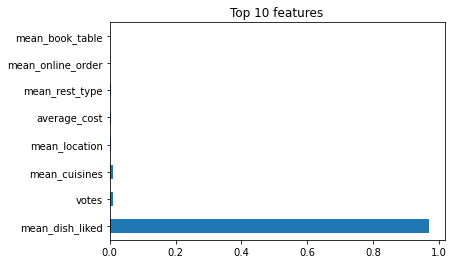

In [60]:
base_imp = pd.Series(rfr.feature_importances_, index=train_data.columns)
base_imp.nlargest(10).plot(kind='barh')
plt.title("Top 10 features")
plt.show()

In [61]:
Randpred = pd.DataFrame({ "actual": y_test, "pred": y_pred_rfr })
Randpred

,actual,pred
35957,4.0,4.000000
4975,4.0,3.999000
21830,3.9,3.900000
11982,3.7,3.700400
2597,3.8,3.800000
...,...,...
6961,3.9,4.000000
19450,4.1,4.100000
32469,3.5,3.489567
3029,4.1,4.100000
